<a href="https://colab.research.google.com/github/FiShaughnesy85/gcp-demo/blob/main/SARIMAMyData2MorePredictors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://thecleverprogrammer.com/2022/06/28/website-traffic-forecasting-using-python/

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

data = pd.read_csv("/content/SARIMA visits excl PS5 spike nov 2022 excl BF excl Easter VISITS ONLY.csv")
print(data.head())

         date    visits
0  01/10/2019  797240.0
1  02/10/2019  719241.0
2  03/10/2019  700060.0
3  04/10/2019  721915.0
4  05/10/2019  839776.0


In [151]:
data["date"] = pd.to_datetime(data["date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1101 non-null   datetime64[ns]
 1   visits  1101 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.3 KB
None


In [152]:
print(data.head())

        date    visits
0 2019-10-01  797240.0
1 2019-10-02  719241.0
2 2019-10-03  700060.0
3 2019-10-04  721915.0
4 2019-10-05  839776.0


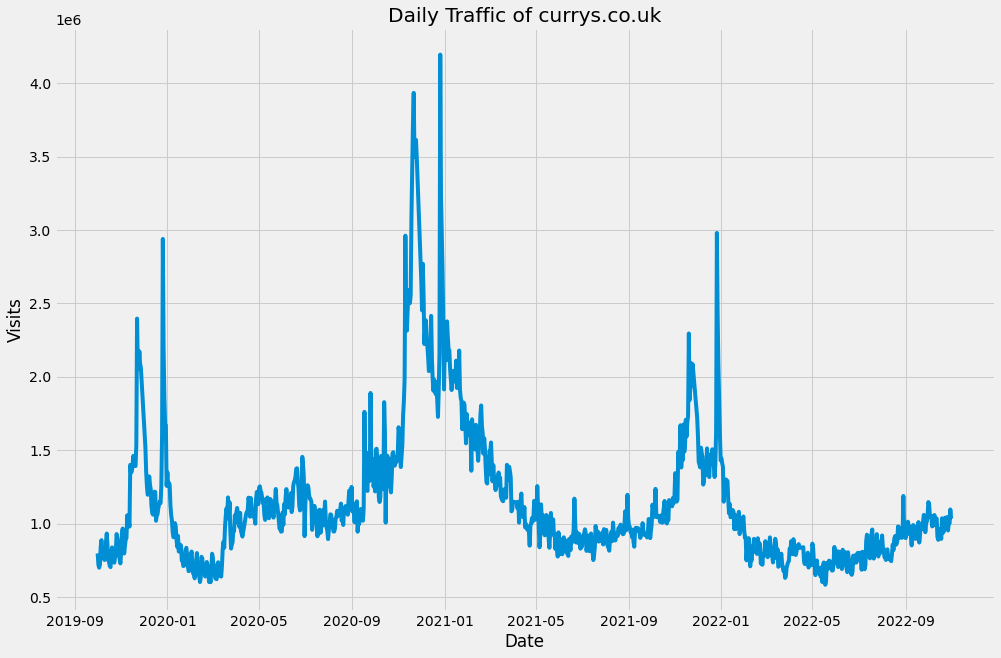

In [153]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["date"], data["visits"])
plt.title("Daily Traffic of currys.co.uk")
plt.xlabel("Date")
plt.ylabel("Visits")
plt.show()

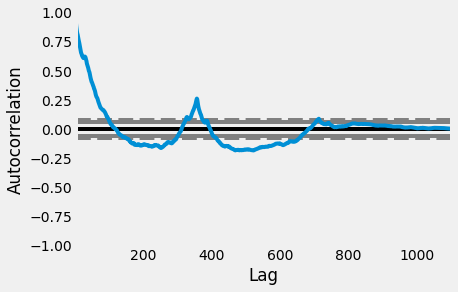

In [154]:
#ACF
pd.plotting.autocorrelation_plot(data["visits"])

P-value:  0.01601270202171452


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


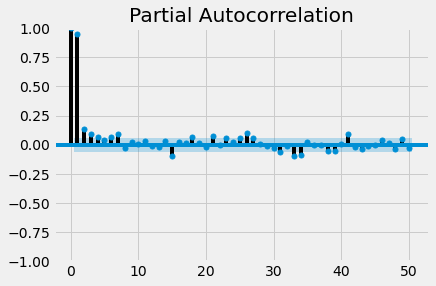

In [155]:
#
# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#
from statsmodels.tsa.stattools import adfuller
#
# Run the test
#
data_stationarityTest = adfuller(data['visits'], autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", data_stationarityTest[1])
#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(data['visits'], lags=50)

In [156]:
#training the model
p, d, q = 3, 2, 2
model=sm.tsa.statespace.SARIMAX(data['visits'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 20
                                              ))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                             visits   No. Observations:                 1101
Model:             SARIMAX(3, 2, 2)x(3, 2, 2, 20)   Log Likelihood              -14796.693
Date:                            Sat, 26 Nov 2022   AIC                          29615.387
Time:                                    20:18:00   BIC                          29670.003
Sample:                                         0   HQIC                         29636.087
                                           - 1101                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9887      6.372     -0.155      0.877     -13.477      11.499
ar.L2         -0.2521      1.143   

In [148]:
predictions = model.predict(len(data), len(data)+200)
print(predictions)

1101    1.016630e+06
1102    1.040728e+06
1103    1.064142e+06
1104    1.072194e+06
1105    1.043325e+06
            ...     
1297    1.989293e+06
1298    2.032427e+06
1299    2.046839e+06
1300    2.058081e+06
1301    1.959771e+06
Name: predicted_mean, Length: 201, dtype: float64


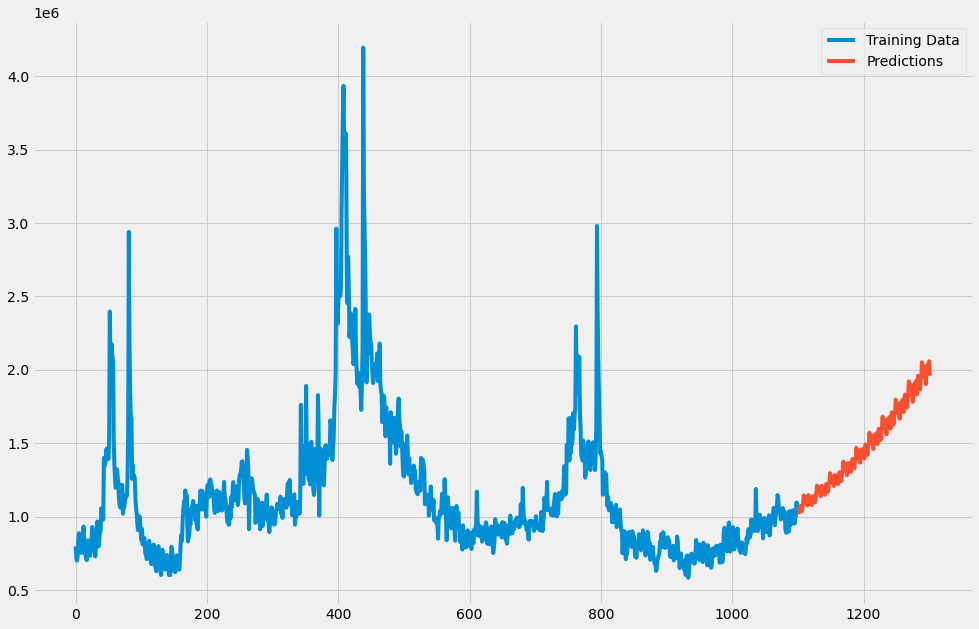

In [149]:
data["visits"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")
